In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from modAL.models import ActiveLearner


In [2]:
#Load our manually annotated data
df = pd.read_csv("TestData_May18.csv")
df = df[['CleanText','ActLabel']]


In [3]:
len(df)

3382

In [4]:
df = df.sample(frac=1)

In [5]:
df_train, df_test = np.split(df, [int(.7*len(df))])

In [6]:
len(df_train)

2367

In [7]:
len(df_test)

1015

In [8]:


# Define our classification model
classifier = MultinomialNB()

In [9]:

# Define active learner
learner = ActiveLearner(
    estimator=classifier,
)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# The resulting matrices will have the shape of (`nr of examples`, `nr of word n-grams`)
vectorizer = CountVectorizer(ngram_range=(1, 5))

X_train = vectorizer.fit_transform(df_train['CleanText'])
X_test = vectorizer.transform(df_test['CleanText'])

In [11]:
y_train_main = df_train['ActLabel'].astype(int)
y_test = df_test['ActLabel'].astype(int)

In [12]:
# Number of instances we want to annotate per iteration
n_instances = 100

# Accuracies after each iteration to keep track of our improvement
accuracies = []

In [13]:
from sklearn.exceptions import NotFittedError
epochs = 10
for i in range(epochs):
# query examples from our training pool with the most uncertain prediction
    query_idx, query_inst = learner.query(X_train, n_instances=n_instances)

# get predictions for the queried examples
    try:
        probabilities = learner.predict_proba(X_train[query_idx])
    # For the very first query we do not have any predictions
    except NotFittedError:
        probabilities = [[0.5, 0.5]]*n_instances
        
    y_train = y_train_main.iloc[query_idx]
    # train the classifier with the newly annotated examples

    learner.teach(X=X_train[query_idx], y=y_train.to_list())

    # Keep track of our improvement
    accuracies.append(learner.score(X=X_test, y=y_test))

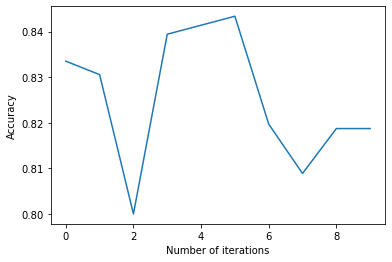

In [14]:
import matplotlib.pyplot as plt

# Plot the accuracy versus the iteration number
plt.plot(accuracies)
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy");

In [15]:
accuracy = [np.round(x,2) for x in accuracies]

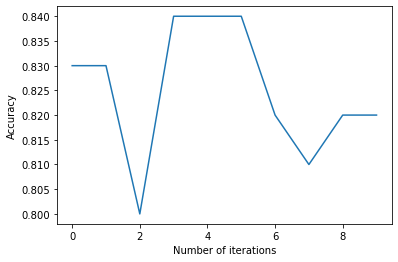

In [16]:
# Plot the accuracy versus the iteration number
plt.plot(accuracy)
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy");